# K-Mean Clustering

In [86]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import pickle

# Load Dataframe

In [87]:
# load resource_priority_df from a file
with open('resource_priority_df.pickle', 'rb') as f:
    resource_priority_df = pickle.load(f)
    
# load ability_priority_df from a file
with open('ability_priority_df.pickle', 'rb') as f:
    ability_priority_df = pickle.load(f)
    
# load player_df from a file (contains lane info)
with open('player_df.pickle', 'rb') as f:
    player_df = pickle.load(f)

# Function for visualizing graph

In [88]:
def show_cluster_graph(scaled_df, clustered_data, title, hero_id):
    plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=clustered_data)
    plt.title(title + str(hero_id))
    plt.show()

In [97]:
def show_vertical_bar_graph(clustered_data, title, x_label, y_label, features_label):
    position_assignments = [features_label[label] for label in clustered_data]
    position_counts = {label: position_assignments.count(label) for label in features_label.values()}
    plt.bar(position_counts.keys(), position_counts.values())
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

# Select a hero for calculation

In [90]:
hero_id = 7  # earthshaker hero id = 7

# K-Mean -- Resource Prioritization

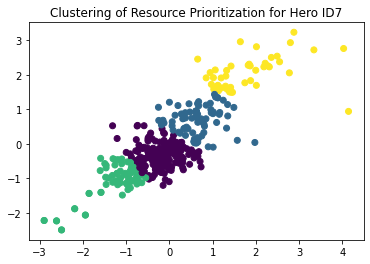

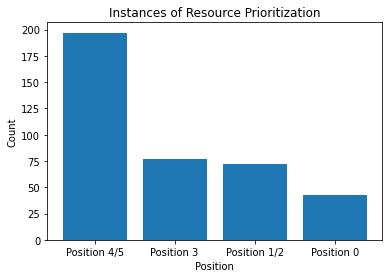

In [98]:
X_rp = resource_priority_df[resource_priority_df['hero_id'] == hero_id]

scale = StandardScaler()
scaled_df_rp = scale.fit_transform(X_rp[['xpm_priority', 'gold_priority']])
    
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_df_rp)
target_hero_roles_rp = kmeans.labels_

show_cluster_graph(scaled_df_rp, target_hero_roles_rp, "Clustering of Resource Prioritization for Hero ID", hero_id)
position_labels = {0:"Position 4/5", 1:"Position 3", 2:"Position 1/2", 3:"Position 0"}
show_vertical_bar_graph(target_hero_roles_rp, 'Instances of Resource Prioritization', 'Position', 'Count', position_labels)

# K-Mean -- Ability Prioritization

In [92]:
ability_priority_df.dropna(inplace=True)

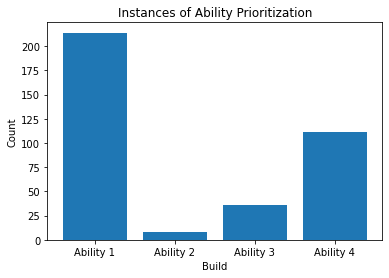

In [100]:
scale = StandardScaler()
scaled_df_ap = scale.fit_transform(ability_priority_df[['A1', 'A2', 'A3', 'A4']])

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_df_ap)
target_hero_roles_ap = kmeans.labels_

ability_labels = {0:"Ability 1", 1:"Ability 2", 2:"Ability 3", 3:"Ability 4"}
show_vertical_bar_graph(target_hero_roles_ap, "Instances of Ability Prioritization", "Build", "Count", ability_labels)

# K-Mean -- Initial Lane (SCRAPPED)

In [49]:
X_lane = player_df[player_df['hero_id'] == hero_id]
X_lane = X_lane[['player_slot', 'team', 'lane']]
X_lane

,player_slot,team,lane
291,1,1,3.0
528,131,0,1.0
910,0,1,3.0
1230,0,1,2.0
1260,0,1,3.0
...,...,...,...
99482,2,1,2.0
99499,132,0,1.0
99574,4,1,3.0
99713,3,1,3.0


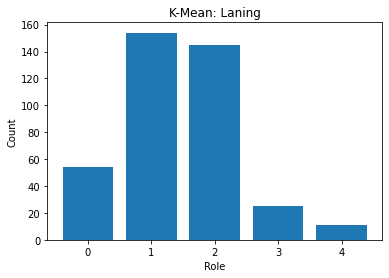

In [54]:
X_lane = player_df[player_df['hero_id'] == hero_id]
X_lane = X_lane[['player_slot', 'team', 'lane']]

scale = StandardScaler()
scaled_df_lane = scale.fit_transform(X_lane)

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_df_lane)
target_hero_roles_lane = kmeans.predict(scaled_df_lane)

show_cluster_counts(target_hero_roles_lane, "K-Mean: Laning")

# Ensemble using Voting-based

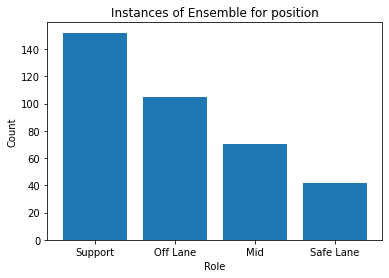

In [105]:
min_length = min(len(target_hero_roles_rp), len(target_hero_roles_ap))
target_hero_roles_rp = target_hero_roles_rp[:min_length]
target_hero_roles_ap = target_hero_roles_ap[:min_length]

combined_labels = np.concatenate((target_hero_roles_rp.reshape(-1, 1), target_hero_roles_ap.reshape(-1, 1)), axis=1)

ensemble_kmeans = KMeans(n_clusters=4, random_state=42)
ensemble_kmeans.fit(combined_labels)
ensemble_labels = ensemble_kmeans.labels_

role_labels = {0:"Support", 1:"Off Lane", 2:"Mid", 3:"Safe Lane"}
show_vertical_bar_graph(ensemble_labels, 'Instances of Ensemble for position', 'Role', 'Count', role_labels)